In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Statistical Mechanics
## Coupled harmonic oscillators
Consider a system of $N$ harmonic oscillators with a total energy
$U$. A single harmonic oscillator has energy levels
$0,\epsilon,2\epsilon, \cdots , \infty$ ($\epsilon>0$). All harmonic
oscillators in the system can exchange energy.

![oscillator](https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/12024/e356fa353ef84ffbbe23ce8e960a485c/d9734329-c4ab-4055-8ff9-16b4a91077b4.png)

*A system of $N$ harmonic oscillators with a total energy
$U$.*

1. Invent a computational scheme for the update of the system at
constant total energy ($U$). Implement it as the function `shift` in the code below.

In [2]:
def shift(oscillators: np.ndarray, energies: np.ndarray) -> (np.ndarray, np.ndarray):
    """
    Implements a very clever scheme to update the energy
    of a system of coupled harmonic oscillators
    at constant total internal energy (U).
    """
    # 优化：直接选择有能量的振子进行能量转移
    non_zero_indices = np.where(energies > 0)[0]
    if len(non_zero_indices) == 0:
        return oscillators, energies
    
    # 随机选择一个有能量的振子
    i = np.random.choice(non_zero_indices)
    # 随机选择另一个不同的振子接收能量
    other_indices = np.array([idx for idx in range(len(oscillators)) if idx != i])
    j = np.random.choice(other_indices)
    
    # 转移一个能量单位
    energies[i] -= 1
    energies[j] += 1
    
    return oscillators, energies

2. Make a plot of the energy distribution ({\it result.dat}) of the
first oscillator as a function of the number of oscillators for a
constant value of $U/N$. Which distribution is recovered when $N$
becomes large ? What is the function of the other $N-1$ harmonic
oscillators ? Explain.

running for 4 oscillators


N=4:   0%|          | 0/400000 [00:00<?, ?it/s]

running for 10 oscillators


N=10:   0%|          | 0/1000000 [00:00<?, ?it/s]

running for 50 oscillators


N=50:   0%|          | 0/5000000 [00:00<?, ?it/s]

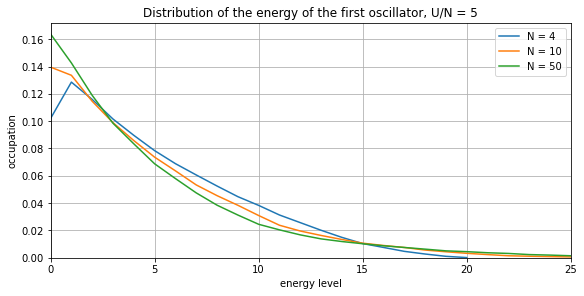

In [4]:
from tqdm.notebook import tqdm
def allocate_energy(number_of_oscillators: int, total_energy: int) -> (np.ndarray, np.ndarray):
    """
    Distribute total_energy units of energy
    among number_of_oscillators harmonic oscillators.
    """
    oscillators = np.arange(0, number_of_oscillators, dtype=int)
    # randomly allocate energy among oscillators
    energies = np.zeros_like(oscillators)
    for _ in range(total_energy):
        i = np.random.choice(oscillators, size=1)
        energies[i] += 1

    # check that the sum of energies is equal to the total energy
    assert energies.sum() == total_energy

    return oscillators, energies


def main():
    fig, ax = plt.subplots(1, 1, figsize=(8,4), constrained_layout=True)
    ax.grid()
    
    energy_per_oscillator = 5
    cycles = 100_000
    oscillator_counts = [4, 10, 50]

    for oscillator_count in oscillator_counts:
        print(f"running for {oscillator_count} oscillators")
        total_energy = oscillator_count * energy_per_oscillator
        distribution = np.zeros(total_energy+1, dtype=int)
        oscillators, energies = allocate_energy(oscillator_count, total_energy)

        total_steps = cycles * oscillator_count
        for cycle in tqdm(range(total_steps), desc=f"N={oscillator_count}"):
            shift(oscillators, energies)
            distribution[energies[0]] += 1

        ax.plot(distribution/cycles/oscillator_count, label="N = {}".format(oscillator_count))

    ax.set_title(f"Distribution of the energy of the first oscillator, U/N = {energy_per_oscillator}")
    ax.set_xlabel("energy level")
    ax.set_ylabel("occupation")
    ax.set_xlim(0, 25)
    ax.set_ylim(0, None)
    ax.legend()
    plt.show()


if __name__ == "__main__":
    main()

3. Compare this distribution with the canonical distribution of a
single oscillator at the same average energy.

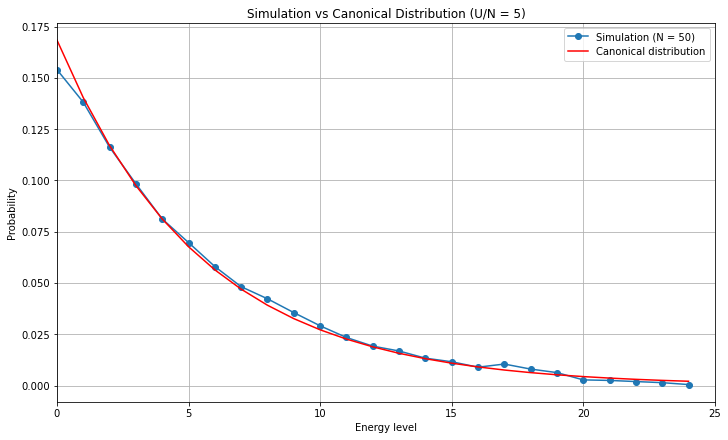

Estimated β: 0.1823
Mean squared error: 0.000011


In [5]:
def canonical_distribution(energy_levels, beta):
    """计算给定β值(1/kT)的谐振子的正则分布"""
    probabilities = np.exp(-beta * energy_levels)
    return probabilities / np.sum(probabilities)

# 改进第3问的分析
def compare_with_canonical():
    fig, ax = plt.subplots(1, 1, figsize=(10, 6), constrained_layout=True)
    ax.grid()
    
    energy_per_oscillator = 5
    energy_levels = np.arange(0, 25)
    
    # 模拟结果
    oscillator_count = 50  # 选择较大的系统
    total_energy = oscillator_count * energy_per_oscillator
    cycles = int(1e4)
    
    distribution = np.zeros(total_energy+1, dtype=int)
    oscillators, energies = allocate_energy(oscillator_count, total_energy)
    
    for cycle in range(cycles*oscillator_count):
        shift(oscillators, energies)
        distribution[energies[0]] += 1
    
    sim_distribution = distribution/cycles/oscillator_count
    ax.plot(energy_levels, sim_distribution[:len(energy_levels)], 'o-', 
            label="Simulation (N = {})".format(oscillator_count))
    
    # 理论计算：正则分布
    # 通过平均能量估计β (反温度)
    avg_energy = energy_per_oscillator
    # 对于量子谐振子，平均能量是 ħω/(exp(ħω/kT)-1)
    # 简化计算β
    beta = np.log(1 + 1/avg_energy)
    theoretical = canonical_distribution(energy_levels, beta)
    
    ax.plot(energy_levels, theoretical, 'r-', label="Canonical distribution")
    
    ax.set_title(f"Simulation vs Canonical Distribution (U/N = {energy_per_oscillator})")
    ax.set_xlabel("Energy level")
    ax.set_ylabel("Probability")
    ax.set_xlim(0, 25)
    ax.legend()
    plt.show()
    
    # 打印偏差
    print(f"Estimated β: {beta:.4f}")
    print(f"Mean squared error: {np.mean((sim_distribution[:len(energy_levels)] - theoretical)**2):.6f}")

# 调用此函数可以替代当前的简单绘图
compare_with_canonical()